In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# read the dataset
df = pd.read_csv('insurance.csv')

In [5]:
df


,Age,Gender,Children,Smoker,BMI,Charges
0,56,Female,4,Yes,21.2,52040
1,46,Female,0,Yes,29.0,44600
2,32,Female,4,Yes,20.6,44720
3,60,Female,0,No,19.0,26800
4,25,Male,3,No,31.3,23260
...,...,...,...,...,...,...
495,36,Female,0,No,19.7,19740
496,49,Female,0,Yes,30.5,45800
497,18,Female,3,Yes,23.1,39520
498,22,Male,2,No,35.9,21780


In [9]:
df.head()

,Age,Gender,Children,Smoker,BMI,Charges
0,56,Female,4,Yes,21.2,52040
1,46,Female,0,Yes,29.0,44600
2,32,Female,4,Yes,20.6,44720
3,60,Female,0,No,19.0,26800
4,25,Male,3,No,31.3,23260


In [11]:
df.shape

(500, 6)

In [13]:
#check for null values in data set
df.isnull().sum()

Age         0
Gender      0
Children    0
Smoker      0
BMI         0
Charges     0
dtype: int64

In [15]:
df.describe()

,Age,Children,BMI,Charges
count,500.000000,500.000000,500.000000,500.000000
mean,41.980000,1.938000,27.424600,36385.920000
std,13.800598,1.424857,6.773517,11153.690051
min,18.000000,0.000000,15.000000,13440.000000
25%,31.000000,1.000000,21.400000,26275.000000
50%,43.000000,2.000000,27.800000,37420.000000
75%,53.000000,3.000000,32.675000,46380.000000
max,65.000000,4.000000,39.900000,56440.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       500 non-null    int64  
 1   Gender    500 non-null    object 
 2   Children  500 non-null    int64  
 3   Smoker    500 non-null    object 
 4   BMI       500 non-null    float64
 5   Charges   500 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


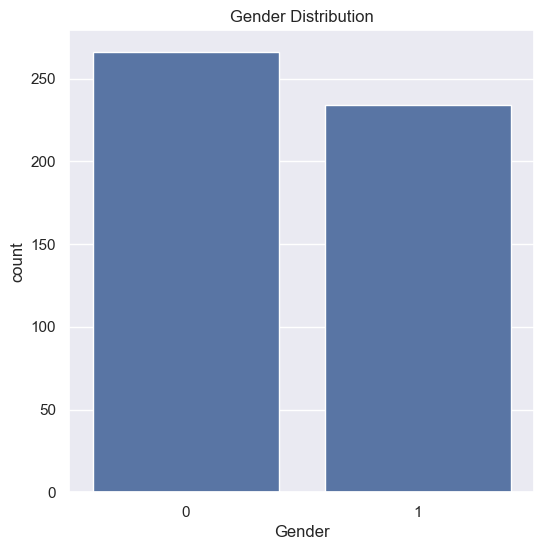

C:\Users\rajiv\AppData\Local\Temp\ipykernel_8656\2224139262.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


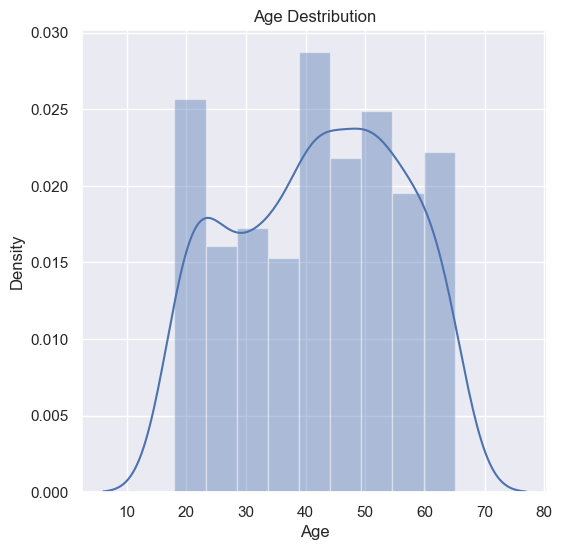

C:\Users\rajiv\AppData\Local\Temp\ipykernel_8656\2224139262.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


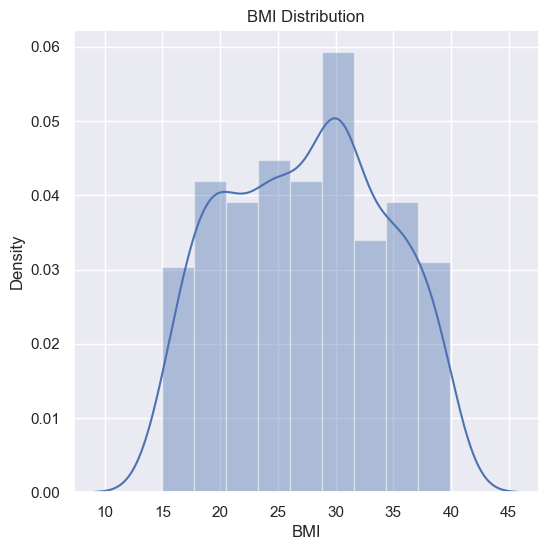

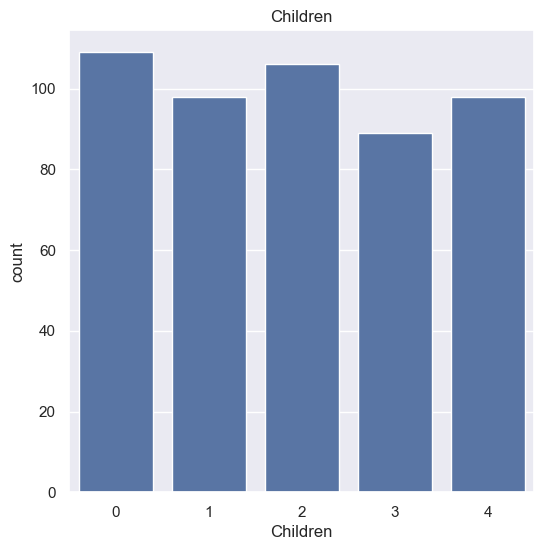

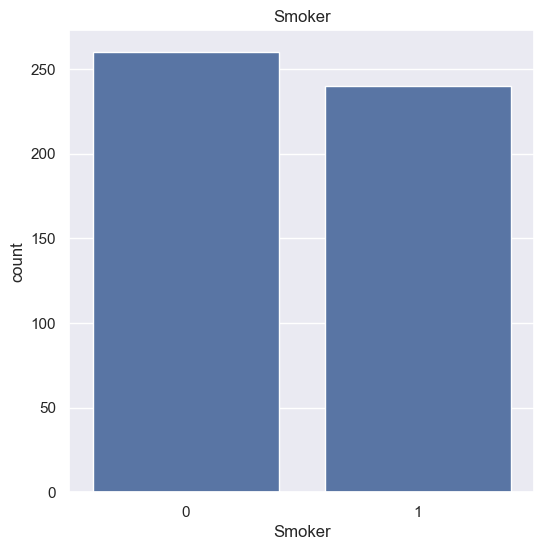

C:\Users\rajiv\AppData\Local\Temp\ipykernel_8656\2224139262.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Charges'])


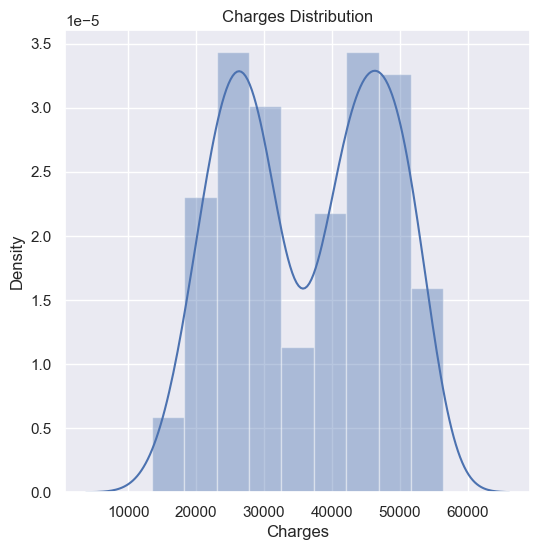

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.title('Age Destribution')
plt.show()
plt.figure(figsize=(6,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data=df)
plt.title('Children')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='Smoker', data=df)
plt.title('Smoker')
plt.show()
plt.figure(figsize=(6,6))
sns.distplot(df['Charges'])
plt.title('Charges Distribution')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Children'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Charges'}>]], dtype=object)

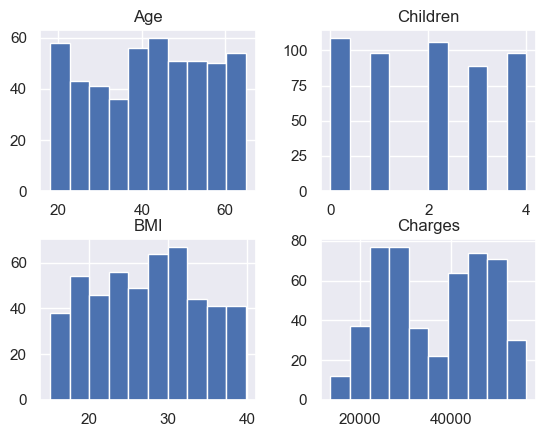

In [21]:
df.hist()

In [35]:
# encoding Gender column
df.replace({'Gender':{'Male':0,'Female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'Smoker':{'Yes':0,'No':1}}, inplace=True)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_8656\2767079865.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Smoker':{'Yes':0,'No':1}}, inplace=True)


In [37]:
X = df.drop(columns='Charges', axis=1)
Y = df['Charges']
X


,Age,Gender,Children,Smoker,BMI
0,56,1,4,0,21.2
1,46,1,0,0,29.0
2,32,1,4,0,20.6
3,60,1,0,1,19.0
4,25,0,3,1,31.3
...,...,...,...,...,...
495,36,1,0,1,19.7
496,49,1,0,0,30.5
497,18,1,3,0,23.1
498,22,0,2,1,35.9


In [39]:
Y

0      52040
1      44600
2      44720
3      26800
4      23260
       ...  
495    19740
496    45800
497    39520
498    21780
499    35740
Name: Charges, Length: 500, dtype: int64

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(500, 5) (400, 5) (100, 5)


In [43]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [45]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  1.0


In [47]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  1.0


In [55]:
input_data = (51,1,2,0,21.2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[47540.]
The insurance cost is  47539.999999999985


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
